In [8]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

ruta = r'C:\Users\Matias Davila\OneDrive - DISTRIBUIDORA Y COMERCIALIZADORA OPEN\Documentos\Matias\Online Retail.xlsx'
df = pd.read_excel(ruta)
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


C:\Users\Matias Davila\AppData\Local\Temp\ipykernel_15248\1480118961.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)
c:\Users\Matias Davila\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                          antecedents  \
92  (SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...   
90  (SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...   
58                    (SET/6 RED SPOTTY PAPER PLATES)   
84           (SET/6 RED SPOTTY PAPER PLATES, POSTAGE)   
52                          (TEA PARTY BIRTHDAY CARD)   
50                (STRAWBERRY LUNCH BOX WITH CUTLERY)   
40              (ROUND SNACK BOXES SET OF4 WOODLAND )   
5                         (ALARM CLOCK BAKELIKE RED )   
30                               (RABBIT NIGHT LIGHT)   
59                      (SET/6 RED SPOTTY PAPER CUPS)   

                        consequents  antecedent support  consequent support  \
92  (SET/6 RED SPOTTY PAPER PLATES)            0.087336            0.109170   
90    (SET/6 RED SPOTTY PAPER CUPS)            0.087336            0.117904   
58    (SET/6 RED SPOTTY PAPER CUPS)            0.109170            0.117904   
84    (SET/6 RED SPOTTY PAPER CUPS)            0.091703 

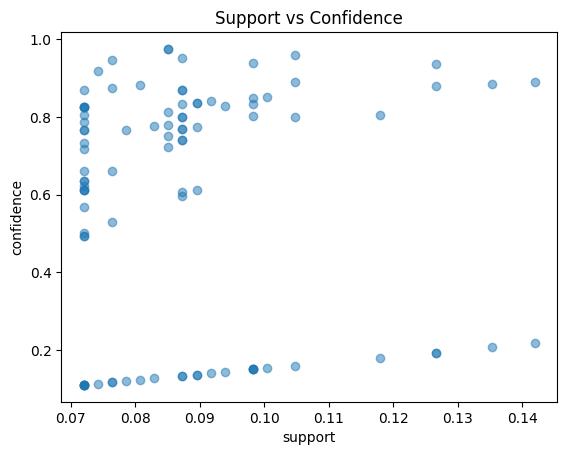

In [9]:
# Eliminar filas con valores nulos
df.dropna(inplace=True)
# Filtrar las transacciones por país (por ejemplo, Francia)
df_france = df[df['Country'] == 'France']
# Convertir los datos en una matriz binaria
basket = (df_france.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
# Encontrar conjuntos de ítems frecuentes
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
# Encontrar reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
# Ordenar las reglas por confianza
rules_sorted = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
# Mostrar las primeras 10 reglas
print(rules_sorted.head(10))
# Estadísticas descriptivas
print(rules.describe())
# Visualizar las reglas usando un gráfico de dispersión
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()
